# Get polygons and images from GBDX

Some of the functions used in this notebook can be found in the nice_functions.py file in the Functions folder

In [14]:
!pip freeze > stable-req.txt


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
### set some parameters
city = 'houston'

buffer_zone = -5

min_size = .2

sample_size = 20


In [1]:
### home made functions
import nice_functions as nf

reload(nf)

import get_OSM_polygons as getOSM

reload(getOSM)

### other libraries

import pandas as pd
import numpy as np

from shapely.ops import transform
from shapely.geometry import mapping, Polygon, box, shape
import matplotlib.pyplot as plt

import random

import fiona

import pickle

from gbdxtools import Interface
from gbdxtools.task import env
from gbdxtools import CatalogImage

gbdx = Interface()

In [4]:

################ this takes a long time

labels = ['forest', 'grass', 'water' , 'building']

dict_size = {'forest': 1 , 'grass': .6, 'water': 1, 'building': .8}

geom_list_selection_all = []

selection_all = pd.DataFrame()

for label in labels: 
    
    selection, geojson_select, geom_list_selection,UTM_EPSG_code,project_utm,project_wgs = getOSM.get_OSM_polygons(city = city, type_query = label,min_size = dict_size[label])
    
           
    geom_list_selection_all.extend(geom_list_selection[1:sample_size])
    
    selection_all = selection_all.append(selection[1:sample_size])
    
################ this takes a long time    

selection_all = selection_all.reset_index().drop('index',axis = 1)

In [6]:
### write data to pickle

import pickle

with open('Pickle/selection_objects_all_{}.pickle'.format(city), 'wb') as handle:
    pickle.dump(selection_all, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('Pickle/geom_list_selection_all{}.pickle'.format(city), 'wb') as handle:
    pickle.dump(geom_list_selection_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('Pickle/project_utm_{}.pickle'.format(city), 'wb') as handle:
    pickle.dump(project_utm, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('Pickle/project_wgs_{}.pickle'.format(city), 'wb') as handle:
    pickle.dump(project_wgs, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    
with open('Pickle/UTM_EPSG_code_{}.pickle'.format(city), 'wb') as handle:
    pickle.dump(UTM_EPSG_code, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
selection_all.sample(20).sort_index()

,id,OSM_id,item_type,name,geom_type,area,check
0,4,OSM-way-468456614,Forest,None,Polygon,8.104205,True
1,6,OSM-way-391995076,Forest,None,Polygon,2.139482,True
11,21,OSM-way-288999148,Forest,None,Polygon,3.381280,True
16,29,OSM-way-390481272,Forest,None,Polygon,3.634895,True
19,15,OSM-way-451869465,Grass,None,Polygon,6.881444,True
27,53,OSM-way-451694993,Grass,None,Polygon,6.742120,True
29,74,OSM-way-387885924,Grass,None,Polygon,0.677239,True
33,94,OSM-way-317796491,Grass,None,Polygon,0.758868,True
34,104,OSM-way-318373269,Grass,None,Polygon,1.282906,True
35,112,OSM-way-389250082,Grass,None,Polygon,1.537075,True


# The rest is test stuff that is incorporated in the functions

In [ ]:
### load data from pickle 


with open('Pickle/project_utm_{}.pickle'.format(city), 'rb') as handle:
    project_utm = pickle.load(handle)


with open('Pickle/selection_objects_all_{}.pickle'.format(city), 'rb') as handle:
    selection_all = pickle.load(handle)
    
    
with open('Pickle/geom_list_selection_all{}.pickle'.format(city), 'rb') as handle:
    geom_list_selection_all = pickle.load(handle)

In [ ]:

## Use Google API to find coordinates of city
bbox_city = nf.get_city_bounding_box(city)


In [ ]:

# get EPSG code and wgs/utm transformation information
UTM_EPSG_code,project_utm,project_wgs = nf.get_projections_and_UTM(bbox_city)


In [ ]:

# query OSM vectors (results come back formatted as geojson) (choose from: water, forest, grass, park, footway,)
geojson = nf.get_OSM_polygons(bbox_city = bbox_city,type_query = 'building')


In [ ]:
### check polygon metadata like cloud cover, size, etc. and return the instances that pass the test sorted on area
### plus a list with all geometries 

selection,geom_list = nf.geojson_variable_check(geojson,project_utm,min_size = .2)



In [ ]:

# get only polygons that pass the above test as geojson
geojson_select = []

for id_nr in selection.id:
    geojson_select.append(geojson[id_nr])
    
    


In [ ]:
# get only polygons that pass the above test as polygons
geom_list_selection = []

for id_nr in selection.id:
    geom = shape(geojson[id_nr]['geometry'])
    geom_list_selection.append(geom)


In [ ]:
selection.head()

In [ ]:
selection, geojson_select, geom_list_selection = getOSM.get_OSM_polygons(type_query = 'forest')

In [ ]:
# view polygons on a map
gbdx.vectors.map(geojson_select,zoom=13)




In [ ]:
# write polygon to file


from shapely.geometry import mapping, Polygon
import fiona

# Here's an example Shapely geometry
poly = geom_list_selection

# Define a polygon feature geometry with one attribute
schema = {
    'geometry': 'Polygon',
    'properties': {'id': 'int'},
}

# Write a new Shapefile
with fiona.open('shapefiles/my_shp2.shp', 'w', 'ESRI Shapefile', schema) as c:
    
    ## If there are multiple geometries, put the "for" loop here
    for poly in geom_list_selection:
        c.write({
            'geometry': mapping(poly),
            'properties': {'id': 123},
        })

In [ ]:
# write 

import shutil
shutil.make_archive("shapefiles", 'zip', "shapefiles")

#### set park number

In [ ]:

park_nr = selection

len(park_nr)

park = 10

buffer_size =  -2



##### Reproject WGS polygon to UTM polygon for the selected park


In [18]:
park_utm = transform(project_utm, geom_list_selection[park])  # apply projection


In [19]:
park_utm.buffer(buffer_size).area/10000

0.9440824588203264

In [20]:
### setting a buffer can remove the polygon or make it into a multipolygon, both are unusable so check if this is the case

# load multipolygon type from pickle for check
multipolygon_type = pickle.load( open( "Pickle/multipolygon_type.p", "rb" ) )

# perform check
if (type(park_utm.buffer(buffer_size)) == multipolygon_type) | (park_utm.buffer(buffer_size).exterior == None):
    print 'nooo'
else:
    print'yes'


yes


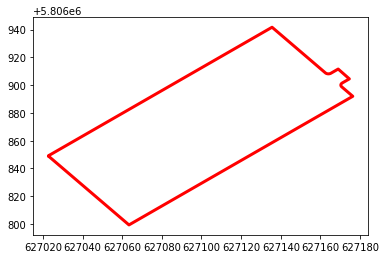

In [21]:
# get x y coordinates of polygon and set a buffer    

if park_utm.buffer(buffer_size).exterior != None:
    x,y = park_utm.buffer(buffer_size).exterior.xy

    # plot polygon
    ax = plt.subplot(111)
    ax.plot(x, y, color='#FF0000', alpha=1,
        linewidth=3, solid_capstyle='round', zorder=2)

    park_buffer_wgs = transform(project_wgs,park_utm.buffer(buffer_size))  # apply projection
else: 
    print'can\'t plot using negative buffer'

In [22]:
# get wgs projected x,y coordinates and create bounding box for image aquisition
x_wgs,y_wgs = park_buffer_wgs.exterior.xy

bbox_park_area = str([min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)])

bbox_park_area_str = nf.listToStringWithoutBrackets(bbox_park_area)

bbox_park_area_float = min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)


In [39]:
# convert bounding box to well known format usable by GBDX tools
bbox_wkt = box(*bbox_park_area_float).wkt
aoi = bbox_wkt

# query images that cover the park
# query = "(item_type:WV03_VNIR OR WV02 OR QB02 OR GE01)"

query = "(item_type:Acquisition)"
#query += " AND NOT item_type:IDAHOImage AND item_type:DigitalGlobeProduct"   
results = gbdx.vectors.query(aoi, query)

# calculate the overlap between image and park

Rectangle = namedtuple('Rectangle', 'xmin ymin xmax ymax')

ra = Rectangle(min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)) # set wgs park area in rectangle

# function for calculating overlap 
def area_overlap(a, b):  # returns None if rectangles don't intersect
    dx = min(a.xmax, b.xmax) - max(a.xmin, b.xmin)
    dy = min(a.ymax, b.ymax) - max(a.ymin, b.ymin)
    if (dx>=0) and (dy>=0):
        return dx*dy




# create dataframe for image metadata
images_df = pd.DataFrame(columns=['id','month','year','type','resolution','cloud cover','overlap','check'])

# loop over all found images and load metadata in dataframe
# also perform a test to find the right images
for r in results:
    props = r['properties']
    geom = r['geometry']
    
    coordinates_image = geom['coordinates'][0][0]
    df_overlap = pd.DataFrame.from_records(coordinates_image,columns = ['x','y'])
    
    rb = Rectangle(df_overlap.x.min(), df_overlap.y.min(), df_overlap.x.max(), df_overlap.y.max())
    
    total_area = ((ra.xmax-ra.xmin)*(ra.ymax-ra.ymin))
    
    total_overlap = area_overlap(ra, rb)
    
    if total_overlap is None:
        fraction_overlap = 0
    else:
        fraction_overlap = area_overlap(ra, rb)/total_area
    
    
    images_df = images_df.append({'id': props['attributes']['catalogID'],'month':props['item_date'][5:7],'year':props['item_date'][0:4],
                   'type':props['item_type'][1],'resolution':props['attributes']['resolution_dbl'],
                   'cloud cover':props['attributes']['cloudCover_int'],'overlap': fraction_overlap,
                    # perform check on, cloud cover, month (summer), and overlap 
                    'check':props['attributes']['cloudCover_int'] < 10 and int(props['item_date'][5:7]) >= 5 and int(props['item_date'][5:7]) <= 11 and 
                   fraction_overlap >.9},ignore_index=True)


# select only the images that survive the test
selection_images = images_df.loc[images_df.check == True].reset_index()

# group by image id because 
selection_images =  selection_images.groupby(['id'],sort=['year','month'],as_index=False).first().sort_values(['year','month'], ascending=False).reset_index()


# print selection
selection_images

KeyError: 'resolution_dbl'

In [ ]:
# for r in results: 
#     r[]


gbdx.vectors.map(results,zoom=13)

# for r in results: 
#     print r['properties']['attributes']['catalogID'], r['properties']['item_type'][3]
    
    
    


In [43]:
results

[{u'geometry': {u'coordinates': [[[[4.581538938000051, 52.49421277000005],
      [4.954243064000025, 52.42803330000004],
      [4.95511792700006, 52.34944538000008],
      [4.956189153000025, 52.26984629000003],
      [4.957478875000049, 52.18920118000005],
      [4.958214356000042, 52.14761676000006],
      [4.578877467000041, 52.21868475000008],
      [4.579156402000024, 52.25950999000003],
      [4.579748217000031, 52.33880056000004],
      [4.580539636000026, 52.41703770000004],
      [4.581538938000051, 52.49421277000005]]]],
   u'type': u'MultiPolygon'},
  u'properties': {u'attributes': {u'browseURL': u'https://geobigdata.io/thumbnails/v1/browse/102001006D728700.large.png',
    u'catalogID': u'102001006D728700',
    u'cloudCover_int': 87,
    u'imageBands': u'PAN',
    u'multiResolution_dbl': None,
    u'multiResolution_end_dbl': None,
    u'multiResolution_max_dbl': None,
    u'multiResolution_min_dbl': None,
    u'multiResolution_start_dbl': None,
    u'offNadirAngle_dbl': 40.4

### Loop over all images that passed the test above and plot them 

Fetching Image... 4 tiles
Fetching Image... 4 tiles


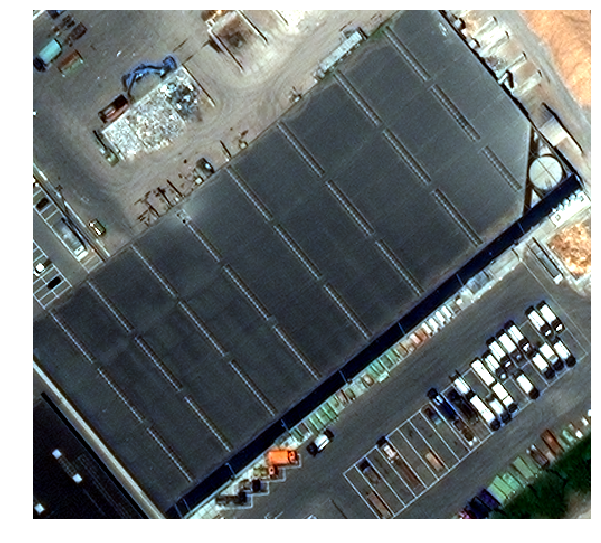

2017-05-27T11:00:32.808Z


In [31]:


# set park bounding box 
bbox = env.inputs.get('bbox', bbox_park_area_str)

i = 1


# set catalog id from selection
catalog_id = env.inputs.get('catalog_id', selection_images.id[i])

# collect image
image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")),proj=UTM_EPSG_code
                     ,pansharpen=True)


# get second band to see if image is defective (some images show only black)
defective_check = image[1,:,:].read()

# use image if not defective, otherwise 
if min(defective_check[1]) != 0 :




    image.plot(w=10, h=10)
    print image.ipe_metadata["image"]["acquisitionDate"]
    image.geotiff(path="raster_files/image_{0}_{1}.tif".format(selection_images.id[i],selection.name[park]))
    # DO THE ANALYSIS HERE 

else:

    print 'image defective' 
    # move to next without doing analysis


In [373]:
### get metadata

print("CatID: {} instantiated as a {} {}-band raster with {} rows and {} columns".format(catalog_id, image.dtype, *image.shape))
print("  with geographic bounds: ({})".format(bbox))
print("  in projection: {}".format(image.ipe_metadata["georef"]["spatialReferenceSystemCode"]))
print("  at {:0.2f} meter resolution".format(image.ipe_metadata["image"]["groundSampleDistanceMeters"]))
print("  and {:0.2f} degrees off nadir".format(image.ipe_metadata["image"]["offNadirAngle"]))
print("  taken on {}".format(image.ipe_metadata["image"]["acquisitionDate"]))

print '  shape', image.shape
print image.ipe.metadata['image']['sensorName']



CatID: 104001002BC52E00 instantiated as a float32 8-band raster with 455 rows and 499 columns
  with geographic bounds: (4.866929696916485, 52.39667082717068, 4.869201066135519, 52.39793226968232)
  in projection: EPSG:32631
  at 0.39 meter resolution
  and 28.40 degrees off nadir
  taken on 2017-05-27T11:00:32.808Z
  shape (8, 455, 499)
8-band (Coastal, Blue, Green, Yellow, Red, Red-edge, NIR1, NIR2) Multispectral


Fetching Image... 4 tiles
Area of the park is 1.0ha
Band Names: 8-band (Coastal, Blue, Green, Yellow, Red, Red-edge, NIR1, NIR2) Multispectral


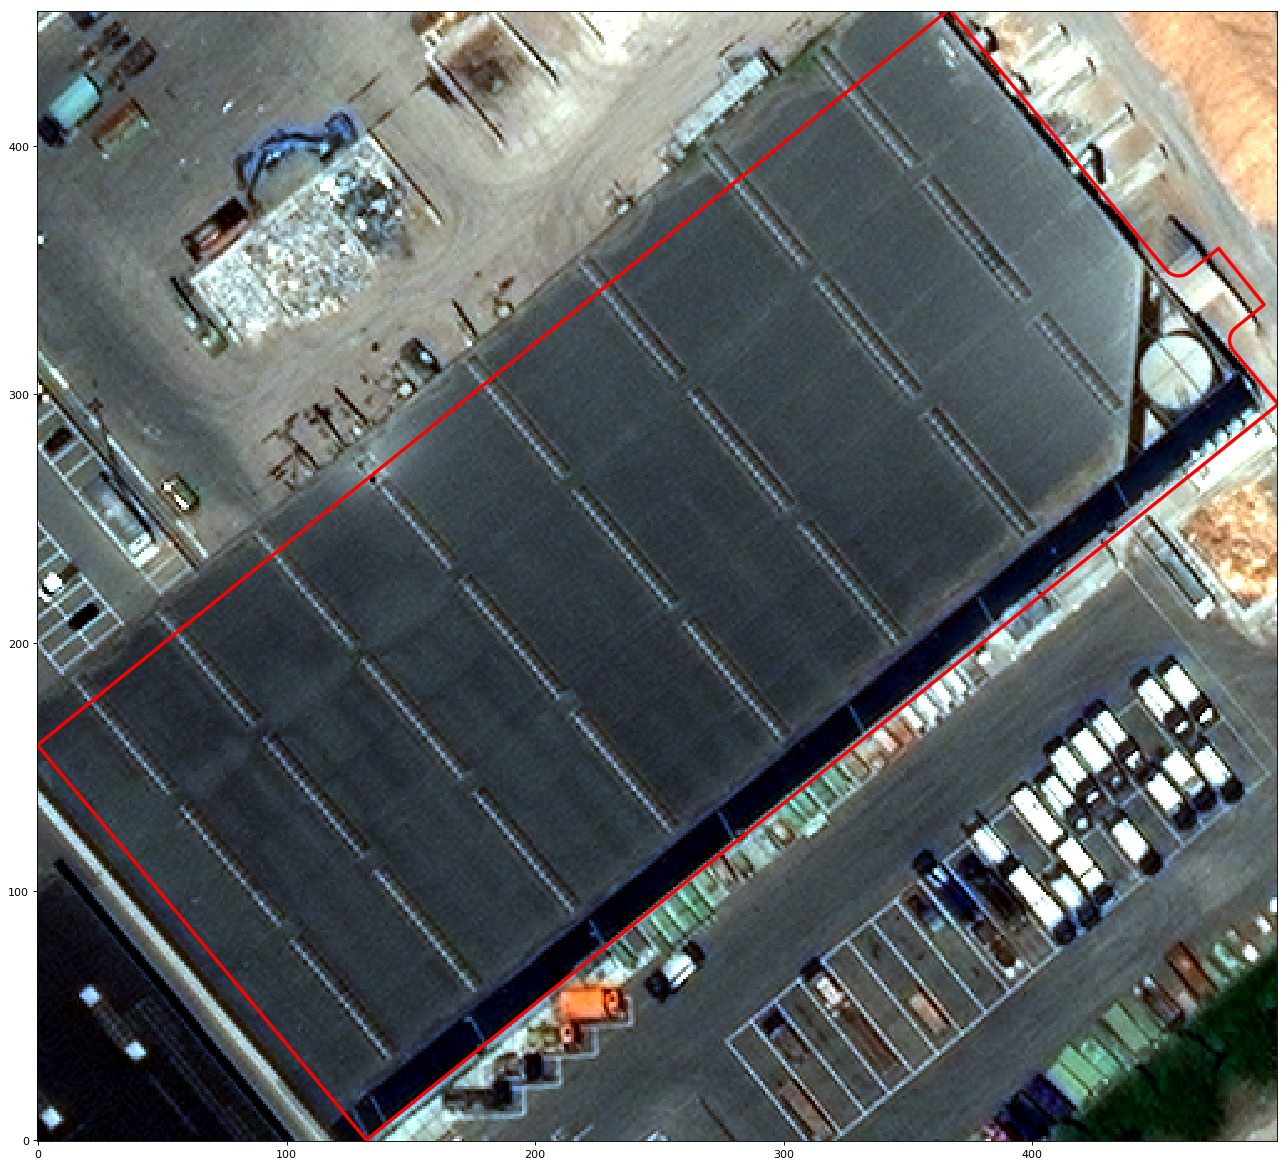

In [374]:
# resize polygon and plot polygon over image

import numpy as np

# subtract minimal values from utm polygon x and y to set 0,0 point as start 
x1 = np.subtract(x, min(x))
y1 = np.subtract(y, min(y))

# devide the x and y coordinate of the polygon by the size of the image to match both sizes 
x2 = np.divide(x1,max(x1)/image.shape[2])
y2 = np.divide(y1,max(y1)/image.shape[1])

# plot image and polygon in one figure
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x2, y2, color='#FF0000', alpha=1,
    linewidth=3, solid_capstyle='round', zorder=2)
plt.imshow(np.flipud(image.rgb()))

plt.gca().invert_yaxis()

print('Area of the park is {:0.1f}ha'.format(park_utm.area/10000))

# Collect the metadata
metadata = image.ipe.metadata['image']
# What are those bands?
print 'Band Names:', metadata['sensorName']


In [306]:
n_bands, rows, cols  = image.shape

In [300]:
## Convert x2 and y2 back to a polygon 
from shapely import geometry

poly = geometry.Polygon([[x2[i], y2[i]] for i in range(len(x2))])


In [301]:
# scikit-image modules for image science operators
from skimage import filters, morphology

## do pixel based analysis
# Calculate the water index
water_index = (image[7,:,:] - image[0,:,:]) / (image[7,:,:] + image[0,:,:])

# Also extract the visible color (i.e., Red-Green-Blue) bands, which we'll use for side-by-side plotting as we proceed
rgb = image.rgb()

# calculate water index and ndvi
rgb = image.rgb()

coastal = image[0,:,:].astype(np.float32)
red = image[4,:,:].astype(np.float32)
nir = image[6,:,:].astype(np.float32)
blue = image [1,:,:].astype(np.float32)
nir2 = image[7,:,:].astype(np.float32)

water_index = (nir2 - coastal)/(nir2 + coastal)

ndvi = np.clip((nir - red)/(nir + red), -1, 1)

EVI = 2.5 * ( nir - red ) / ( nir + 6.5 * red - 7.5 * blue+ 1.0 )

# set threshold values for water, tree, etc. 
A = ndvi >= 0.6
B = ndvi.all() >= 0.3 and ndvi.all() < 0.6
C = ndvi < 0.3
plants= A*2+B*3+C

# First, clean up any nan values
water_index[np.isnan(water_index)] = 0

# Next, run a gaussian smoothing kernel over the image. This will smooth out localized noise in the water index
# by use a focal moving window.
water_index_smoothed = filters.gaussian(water_index, preserve_range=True)

# Finally, we are going to run the thresholding. We are going to use a method called Otsu's method,
# which picks the threshold that will maximize the variance between the values on either side of it.
# For more info on Otsu's Method, see: 
# http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html
# and http://en.wikipedia.org/wiki/Otsu’s_method.


# Find the threshold
binary_threshold = -0.5 

# Apply the threshold
binary_water = water_index_smoothed >= binary_threshold
# Specify the minimum feature size in square meters, and then use info from the image metadata 
# to translate to grid cell count.

# Set the minimum feature size to 400 sq km (400,000 m)
min_feature_size_m2 = 40.

# From the image metadata, we can determine the area of a single grid cell
cell_height_m = image.ipe.metadata['image']['groundSampleDistanceMeters']
cell_area_m2 = cell_height_m**2

# Finally, use the cell size to convert the minimum feature size to grid cells
min_feature_size_cells = np.round((min_feature_size_m2/cell_area_m2)).astype('int64')

# First, remove the small holes
water_cleaned = morphology.remove_small_holes(binary_water, min_feature_size_cells)

# Then remove the small objects
water_cleaned = morphology.remove_small_objects(water_cleaned, min_feature_size_cells, connectivity=2)

# Combine all layers for easier analysis
all_layers = plants+water_cleaned*3

Fetching Image... 16 tiles
Fetching Image... 16 tiles


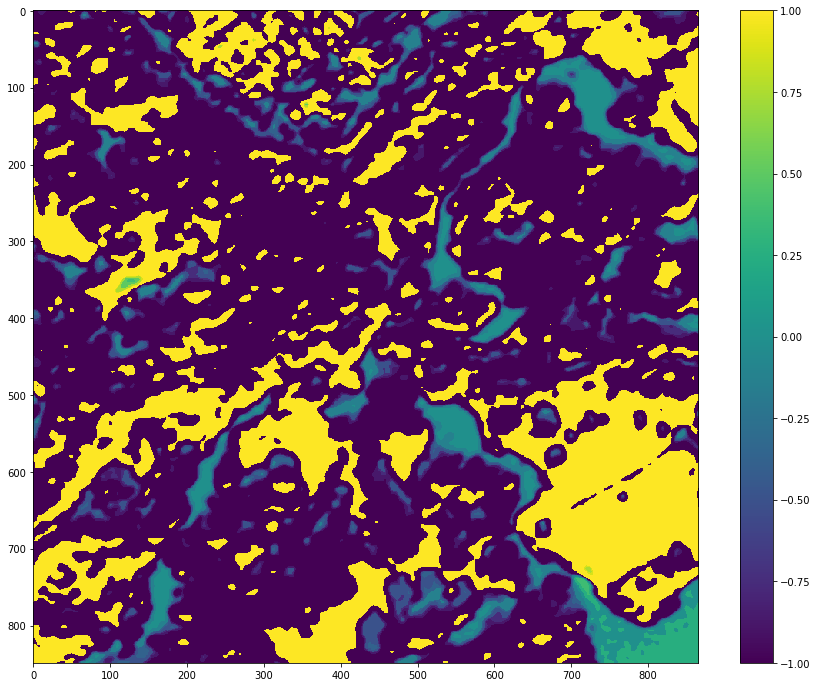

In [302]:
# plot one of the calculated rasters

def plot(image, w=15, h=12, cmap='jet'):
    f, ax = plt.subplots(1, figsize=(w,h))
    ax.axis('on')
    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.show()
    

plt.subplots(1,figsize=(15,12))
plt.imshow(EVI, vmin=-1, vmax=1,) # edit this to plot another raster
plt.colorbar()


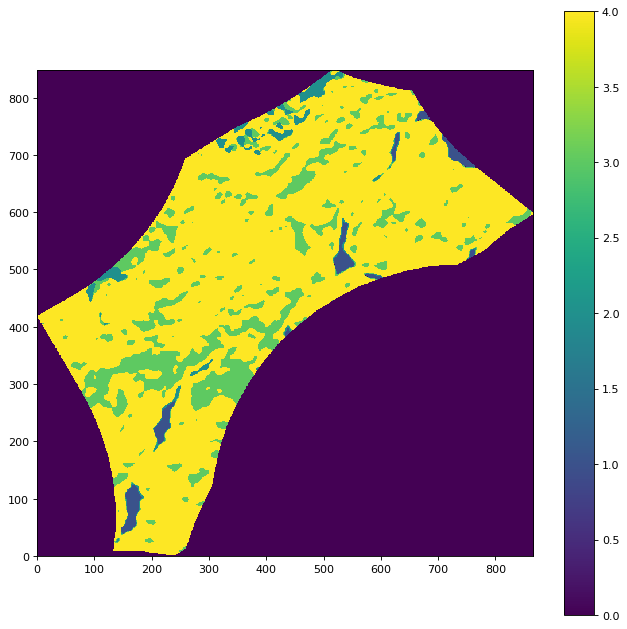

In [303]:
from PIL import Image, ImageDraw
import copy

# calculate total cells for each class by masking and setting pixel values to 1

# create sequence of edited x and y coordinates, widht and heigth  for use in ImageDraw function
polygon = [(x2[i], y2[i]) for i in range(len(x2))]
width = all_layers.shape[1]
height = all_layers.shape[0]


# convert polygon coordinates to raster/array values using ImageDraw
img = Image.new('L', (width, height), 0)
ImageDraw.Draw(img).polygon(polygon, fill=1)
# convert image to array and set as mask
mask = np.array(img)

# create boolean mask
mask = mask == 1

# copy layers for classification
EVI_test = copy.copy(EVI)
test_image = copy.copy(all_layers)

# flip image and EVI to allign with polygon based mask
EVI_test = np.flipud(EVI_test)
test_image = np.flipud(test_image)


# apply mask to test image 
test_image[mask == 0] = 0

# copy layers for total pixel count 
test_image_buildup = copy.copy(test_image)
test_image_water = copy.copy(test_image)
test_image_Green = copy.copy(test_image)
total_pixels = copy.copy(test_image)


# remove all pixel values that do not belong to class and set all other pixel values to 1
test_image_buildup[test_image_buildup != 4] = 0
test_image_water[test_image_water != 1] = 0



test_image_buildup[test_image_buildup == 4] = 1
test_image_water[test_image_water == 1] = 1

test_image_Green[test_image_Green == 3] = 5
test_image_Green[ test_image_Green != 5] = 0

test_image_Green[test_image_Green == 5] = 1

test_image_Trees = copy.copy(test_image_Green)
test_image_Grass = copy.copy(test_image_Green)

test_image_Trees[EVI_test > -.25] = 0
test_image_Grass[EVI_test < -.25] = 0

total_pixels[total_pixels > 0] = 1

# create final classification i
final_classification = test_image_water+(2*test_image_buildup)+(3*test_image_Grass)+(4*test_image_Trees)

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(final_classification, vmin=0, vmax=4)
# plt.imshow(test_image_Trees, vmin=-1, vmax=1)
plt.colorbar()
plt.gca().invert_yaxis()




In [304]:
# calculate percentage of pixels covered per class

percentage_trees  = round((float(sum(sum(test_image_Trees)))/float(sum(sum(total_pixels))))*100,1)
percentage_buildup  = round(float(sum(sum(test_image_buildup)))/float(sum(sum(total_pixels)))*100,1)
percentage_water  = round(float(sum(sum(test_image_water)))/float(sum(sum(total_pixels)))*100,1)
percentage_grass  = round(float(sum(sum(test_image_Grass)))/float(sum(sum(total_pixels)))*100,1)


# print results
print 'Total pixels            ', sum(sum(total_pixels))
print 'Total tree pixels       ', sum(sum(test_image_Trees)),' which is ', percentage_trees, '%'
print 'Total grass pixels      ', sum(sum(test_image_Grass)),' which is ', percentage_grass, '%'
print 'Total impervious pixels ', sum(sum(test_image_buildup)),' which is  ', percentage_buildup, '%'
print 'Total water pixels      ', sum(sum(test_image_water)),' which is  ', percentage_water, '%'

print percentage_trees + percentage_buildup + percentage_water + percentage_grass

Total pixels             297369
Total tree pixels        239359  which is  80.5 %
Total grass pixels       46134  which is  15.5 %
Total impervious pixels  6337  which is   2.1 %
Total water pixels       5539  which is   1.9 %
100.0


In [177]:
# Take a look at: !!
# https://gis.stackexchange.com/questions/260304/extract-raster-values-within-shapefile-with-pygeoprocessing-or-gdal
# https://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html
# https://mapbox.github.io/rasterio/topics/masking-by-shapefile.html

In [96]:
reload(ct)

<module 'classification_tools' from 'classification_tools.pyc'>

In [3]:
import classification_tools as ct
import gdal
import matplotlib.pyplot as plt
import numpy as np


raster_data_path = "raster_files/sloterpark.tif"
output_fname = "classification.tiff"
train_data_path = "shapefiles"
validation_data_path = "data/train/"

raster_dataset = gdal.Open(raster_data_path, gdal.GA_ReadOnly)
geo_transform = raster_dataset.GetGeoTransform()
proj = raster_dataset.GetProjectionRef()
bands_data = []
for b in range(1, raster_dataset.RasterCount+1):
    band = raster_dataset.GetRasterBand(b)
    bands_data.append(band.ReadAsArray())

bands_data = np.dstack(bands_data)
rows, cols, n_bands = bands_data.shape

bands_data.shape


rows*cols*n_bands

7061040

In [4]:
reshaped_data = bands_data.reshape(((rows*cols*n_bands)/n_bands),1,n_bands)



In [5]:
import os


files = [f for f in os.listdir(train_data_path) if f.endswith('.shp')]
classes = [f.split('.')[0] for f in files]
shapefiles = [os.path.join(train_data_path, f)
              for f in files if f.endswith('.shp')]

shapefiles

['shapefiles/my_shp2.shp']

In [6]:
import os


files = [f for f in os.listdir(train_data_path) if f.endswith('.shp')]
classes = [f.split('.')[0] for f in files]
shapefiles = [os.path.join(train_data_path, f)
              for f in files if f.endswith('.shp')]

labeled_pixels = ct.vectors_to_raster(shapefiles, rows, cols, geo_transform,
                                   proj)
is_train = np.nonzero(labeled_pixels)
training_labels = labeled_pixels[is_train]
training_samples = bands_data[is_train]

array([], dtype=float64)